# EDA ver4 : 
- 역번역(한-일-한) 데이터(23258 rows)
- 원본 train 데이터(32470 rows)
- 원본(32470 rows) + 역번역 데이터(23258 rows) = 55728 rows

> 역번역 :   
train.csv(원본)을 train/vail(9:1)로 나누고 train data(29223 rows)에서 역번역 진행.

# **setting**

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

#import os
#os.chdir('./data')
#os.getcwd()

**역번역 데이터, 추가된 train 데이터 불러오기**

In [27]:
kjk_path = '/opt/ml/dataset/train/aug_kjk.csv'

# 원본(32470 rows) + 역번역 데이터(23258 rows ) = 55728 rows
kjk_train = pd.read_csv(kjk_path)

# 역번역 데이터 : 23258 rows 
add_kjk = kjk_train[kjk_train.source.isnull()]

# **EDA**   
- 역번역 데이터는 train.csv 데이터의 라벨 분포와 같음.
- 모든 라벨의 데이터 수 증강 비율을 같게 진행함.

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
def view_count(dataset,labels : str):
    # count 분포
    view = sns.countplot(data=dataset,x=labels,order = dataset[labels].value_counts().index)
    # label명 표시
    view.set_xticklabels(view.get_xticklabels(), rotation=90)

    # 각 막대에 숫자 표시
    for p in view.patches:
        height = p.get_height()
        view.text(p.get_x() + p.get_width() / 2., height + 3, int(height), ha = 'center', size = 6.5)

    plt.show()
    return 

### **01.역번역 데이터(add_kjk) : 라벨 분포**

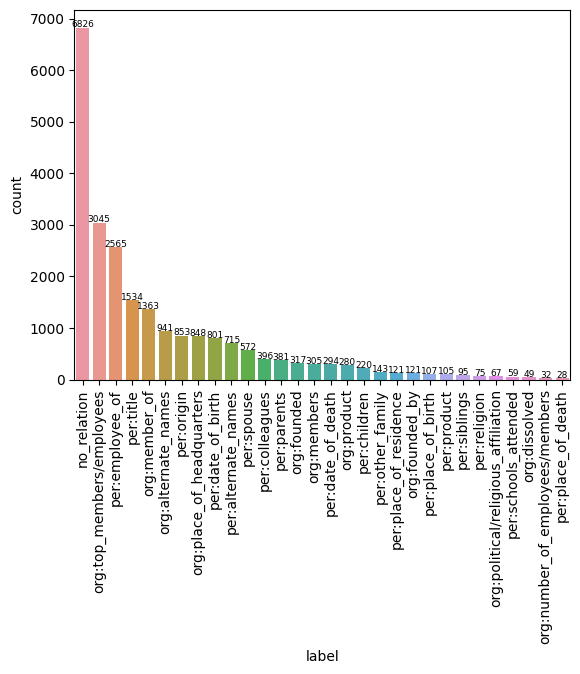

In [44]:
view_count(add_kjk,'label')

### **02.역번역+원본 데이터(kjk_train) : 라벨 분포**

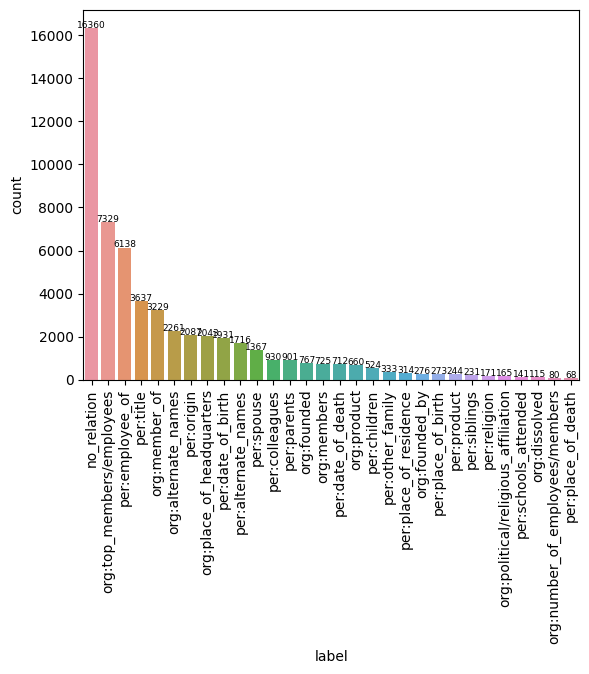

In [46]:
view_count(kjk_train,'label')

# **성능 테스트**
- model : klue/roberta-base
- batch_size: 16, max_epoch: 3, learning_rate: 1e-5

| model | test_auprc | test_f1 |
| --- | --- | --- |
| base | 79.247 | 82.679 |
| kjk | 70.032 | 80.803 |

# **결과**   
- 성능 테스트 결과, 역번역 데이터를 추가한 데이터가 원본 데이터 테스트보다 낮은 성능을 가짐.
- 원본 데이터 승.